# The Health Company Diet

# Importing the Libraries

In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
from statsmodels.formula.api import ols      # For n-way ANOVA
from statsmodels.stats.anova import _get_covariance,anova_lm # For n-way ANOVA
%matplotlib inline

# Loading the dataset CSV file

In [22]:
df=pd.read_csv('C:\\Users\\jayveer\\Downloads\\diet.csv.csv')

# Checking the top 5 records

In [23]:
df.head()

,gender,Diet,weight,weight6weeks
0,M,B,60,60.0
1,M,B,103,103.0
2,F,A,58,54.2
3,F,A,60,54.0
4,F,A,64,63.3


# Checking the shape and information of the dataframe

In [24]:
df.shape

(78, 4)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 4 columns):
gender          78 non-null object
Diet            78 non-null object
weight          78 non-null int64
weight6weeks    78 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 2.5+ KB


# Checking the summary of the dataframe

In [26]:
df.describe(include='all')

,gender,Diet,weight,weight6weeks
count,78,78,78.000000,78.000000
unique,2,3,NaN,NaN
top,F,B,NaN,NaN
freq,43,27,NaN,NaN
mean,NaN,NaN,72.525641,68.680769
std,NaN,NaN,8.723344,8.924504
min,NaN,NaN,58.000000,53.000000
25%,NaN,NaN,66.000000,61.850000
50%,NaN,NaN,72.000000,68.950000
75%,NaN,NaN,78.000000,73.825000


# Checking for missing values

In [27]:
df.isnull().sum()

gender          0
Diet            0
weight          0
weight6weeks    0
dtype: int64

# Checking distinct values of Diet

In [28]:
df.Diet.value_counts()

B    27
C    27
A    24
Name: Diet, dtype: int64

# Creating box plots

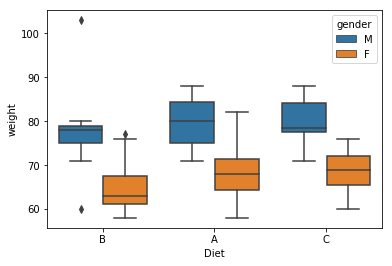

In [29]:
sns.boxplot(x="Diet", y="weight", data=df,hue='gender')

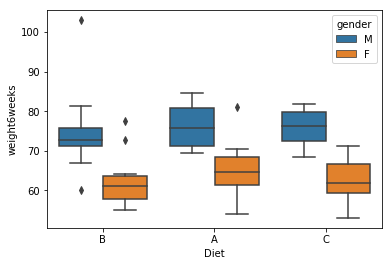

In [31]:
sns.boxplot(x="Diet", y="weight6weeks", data=df,hue='gender')

# Anova with both Categorical variables

In [16]:
formula = 'weight6weeks ~ C(gender) + C(Diet)'
model = ols(formula, df).fit()
aov_table = anova_lm(model)
print(aov_table)

C:\Users\jayveer\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\jayveer\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\jayveer\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


             df       sum_sq      mean_sq          F        PR(>F)
C(gender)   1.0  2854.201553  2854.201553  65.765339  8.037802e-12
C(Diet)     2.0    67.015520    33.507760   0.772072  4.657403e-01
Residual   74.0  3211.584082    43.399785        NaN           NaN


# Anova with one Categorical 'Diet' and weight variable 

In [33]:
formula = 'weight6weeks ~ + C(Diet) + weight'
model = ols(formula, df).fit()
aov_table = anova_lm(model)
print(aov_table)

            df       sum_sq      mean_sq           F        PR(>F)
C(Diet)    2.0    29.841339    14.920670    2.569098  8.342306e-02
weight     1.0  5673.186636  5673.186636  976.831110  2.218898e-44
Residual  74.0   429.773179     5.807746         NaN           NaN


C:\Users\jayveer\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\jayveer\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\jayveer\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


# Anova with all variables

In [34]:
formula = 'weight6weeks ~C(gender) + C(Diet) + weight'
model = ols(formula, df).fit()
aov_table = anova_lm(model)
print(aov_table)

             df       sum_sq      mean_sq           F        PR(>F)
C(gender)   1.0  2854.201553  2854.201553  486.296708  5.255797e-34
C(Diet)     2.0    67.015520    33.507760    5.709027  4.970438e-03
weight      1.0  2783.128141  2783.128141  474.187273  1.170357e-33
Residual   73.0   428.455941     5.869259         NaN           NaN


C:\Users\jayveer\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\jayveer\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\jayveer\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


Since the p value in all the above scenarios are less than the significant value 0.05, we can say that we reject the null hypothesis and weights after 6 weeks in the combination of diet and gender are not same.